## NAME -  ADITYA VIJAY VARGIYA (INTERN AT THE SPARKS FOUNDATION)

### THE SPARKS FOUNDATION GRIP (Graduate Rotational Internship Program) MAY 2021 BATCH
### DATA SCIENCE AND BUSINESS ANALYTICS

### TASK 6 :- CREATE THE DECISION TREE CLASSIFIER AND VISUALIZE IT GRAPHICALLY.
### PREDICTION USING DECISION TREE ALGORITHM 

### Import Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Set data path 

In [3]:
data_path =  '/content/drive/My Drive/Colab Notebooks'

### Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

### Load the Data

In [5]:
mydata_iris=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Iris.csv")
mydata_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# To Check first 5 rows of Dataset
mydata_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [7]:
# Checking all the columns
mydata_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Drop the 'Id' column
mydata_iris.drop('Id',axis = 1, inplace = True)

In [9]:
# To Check first 5 rows of Dataset
mydata_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Information of the Dataset
mydata_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Shape Of the Dataset
mydata_iris.shape

(150, 5)

In [12]:
# Datatype of each Attribute 
mydata_iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
# Checking the presence of Missing values
mydata_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
# To check Statistical Details of Dataset
mydata_iris.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# To check the Skewness of the Attributes
mydata_iris.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

### Data Visualization

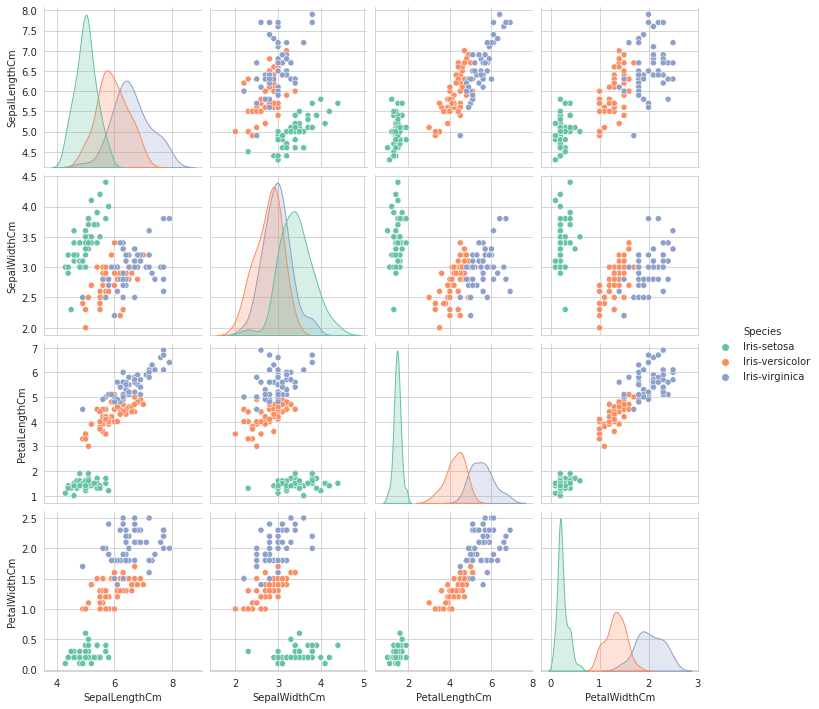

In [17]:
# Pair plot
sns.pairplot(mydata_iris,hue = 'Species',palette = 'Set2')

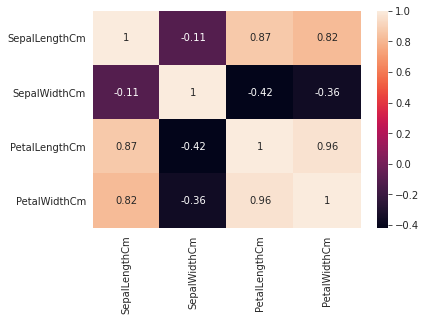

In [18]:
# Correlation between the Attributes
sns.heatmap(mydata_iris.corr(), annot=True)

### Putting Feature variable to X and Response variable to Y

In [19]:
X = mydata_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = mydata_iris[['Species']]

### Splitting data into Train and Test data

In [20]:
from sklearn.model_selection import train_test_split # Import Library
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (105, 4)
X_test (45, 4)
y_train (105, 1)
y_test (45, 1)


### Decision Tree Algorithm and Visualization

In [21]:
# Importing libraries for Decision tree algorithm and Visualization
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import pydotplus
from sklearn import tree
from six import StringIO
from IPython.display import Image  
import matplotlib.image as mpimg
from sklearn import metrics

In [23]:
# Defining the decision tree algorithm
dt_model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=60)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=60, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

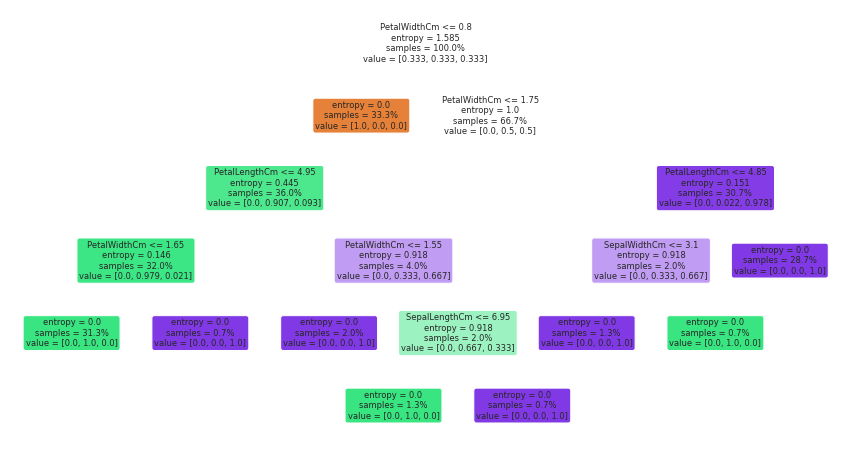

In [36]:
# Visualize the Decision Tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt_model, filled=True, feature_names=mydata_iris.columns, precision = 3, proportion =True, rounded=True) 
plt.show()

### Predict Test Data

In [29]:
predict_test = dt_model.predict(X_test)

In [33]:
print("The Accuracy of Decision Tree is", metrics.accuracy_score(predict_test,y_test) * 100 ,'%')

The Accuracy of Decision Tree is 95.55555555555556 %


### Model Evaluation

In [31]:
from sklearn.metrics import classification_report,confusion_matrix # Import library
confusion_matrix(y_test, predict_test)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

In [34]:
dt_model.score(X_test, y_test)

0.9555555555555556